In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style("dark")

In [1]:
import conllu

In [2]:
data = open("dataset/train-en.conllu", "r", encoding="utf-8").read()

In [3]:
print(data[:395])

# text: tell me the weather report for half moon bay
# intent: weather/find
# slots: 12:26:weather/noun,31:44:location
1	tell	weather/find	NoLabel
2	me	weather/find	NoLabel
3	the	weather/find	NoLabel
4	weather	weather/find	B-weather/noun
5	report	weather/find	I-weather/noun
6	for	weather/find	NoLabel
7	half	weather/find	B-location
8	moon	weather/find	I-location
9	bay	weather/find	I-location




In [4]:
sentences = conllu.parse(data)
len(sentences)

30521

In [5]:

[print(repr(sentences[0][i])) for i in range(9)];

{'id': 1, 'form': 'tell', 'lemma': 'weather/find', 'upos': 'NoLabel'}
{'id': 2, 'form': 'me', 'lemma': 'weather/find', 'upos': 'NoLabel'}
{'id': 3, 'form': 'the', 'lemma': 'weather/find', 'upos': 'NoLabel'}
{'id': 4, 'form': 'weather', 'lemma': 'weather/find', 'upos': 'B-weather/noun'}
{'id': 5, 'form': 'report', 'lemma': 'weather/find', 'upos': 'I-weather/noun'}
{'id': 6, 'form': 'for', 'lemma': 'weather/find', 'upos': 'NoLabel'}
{'id': 7, 'form': 'half', 'lemma': 'weather/find', 'upos': 'B-location'}
{'id': 8, 'form': 'moon', 'lemma': 'weather/find', 'upos': 'I-location'}
{'id': 9, 'form': 'bay', 'lemma': 'weather/find', 'upos': 'I-location'}


In [42]:
last_text = ""
counter = 1
id = 1
counts = []
texts = []
for i in range(len(sentences)):
    text = " ".join([sentences[i][j]["form"] for j in range(len(sentences[i]))])
    texts.append(text)
    if text != last_text:
        if counter > 1:
            print("   Number of duplicate sentences: ", counter, "\n")
            counts.append(counter)
            counter = 1

        print(f"{id}) {text}")
        id += 1
        last_text = text
    else:
        # print("Duplicate sentence")
        counter += 1

1) tell me the weather report for half moon bay
   Number of duplicate sentences:  5 

2) give me the latest forecast for half moon bay
   Number of duplicate sentences:  5 

3) give me friday's forecast for half moon bay
   Number of duplicate sentences:  5 

4) i need to know the latest forecast for half moon bay
   Number of duplicate sentences:  3 

5) do you have thursday's weather report for half moon bay
   Number of duplicate sentences:  3 

6) do you have wednesday's weather forecast for half moon bay
   Number of duplicate sentences:  5 

7) give me most recent forecast for half moon bay
   Number of duplicate sentences:  5 

8) give me thursday's half moon bay weather report
   Number of duplicate sentences:  5 

9) give me the most recent half moon bay weather report
   Number of duplicate sentences:  5 

10) i need half moon bay's weather report for sunday
   Number of duplicate sentences:  5 

11) i need half moon bay's weather report for monday
   Number of duplicate sen

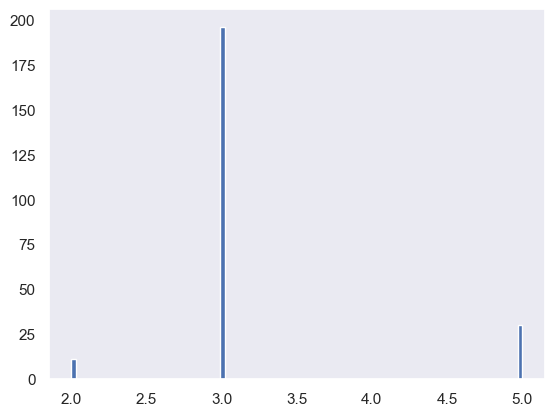

In [16]:
# Plot the counts
plt.hist(counts, bins=100)
plt.show()


In [20]:
import pandas as pd
import numpy as np

df = pd.DataFrame(texts, columns=["text"])
df.head()

,text
0,tell me the weather report for half moon bay
1,tell me the weather report for half moon bay
2,tell me the weather report for half moon bay
3,tell me the weather report for half moon bay
4,tell me the weather report for half moon bay


In [68]:
df.text.value_counts()

cancel all alarms                    77
delete all alarms                    60
show all alarms                      58
show all reminders                   51
turn off alarm                       51
                                     ..
will it be windy is seattle today     1
set my alarm for 3 hours from now     1
set alarm for 420am                   1
show my reminder for tomorrow         1
set the alarm for tonight .           1
Name: text, Length: 22987, dtype: int64

In [40]:
len(texts)

30521

In [41]:
len(set(texts))

22987

### Read and Count Chunks

In [46]:
with open("dataset/train-en.conllu", "r", encoding="utf-8") as f:
    data = f.read()
    chunks = data.split("\n\n")

len(chunks), len(set(chunks))

(30522, 24561)

### Make Unique

In [47]:
with open("dataset/train-en-unique.conllu", "w+", encoding="utf-8") as f:
    for chunk in set(chunks):
        f.write(chunk + "\n\n")

In [66]:
with open("dataset/train-en-unique.conllu", "r", encoding="utf-8") as f:
    data = f.read()
    chunks = data.split("\n\n")

len(chunks), len(set(chunks))

(24561, 24561)